In [134]:
import numpy as np
import pandas as pd
import math

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.svm import SVC

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,9)

# 1. Principal Component Analysis

## 1.1 Theory

PCA is an unsupervised method.  As such, in our basic setup we only have data points $x^{(i)}$ and no labels.  Since there is no classification task, what does PCA do?

Now, we may have a large collection of data points $D = \{x^{(i)}\mid i=1,\ldots,N\}$ in some $\mathbb{R}^n$ for some large $n$.  However, it is possible that our data points may not be distributed equally likely in all directions.  For example, consider the following data sets in $\mathbb{R}^2$

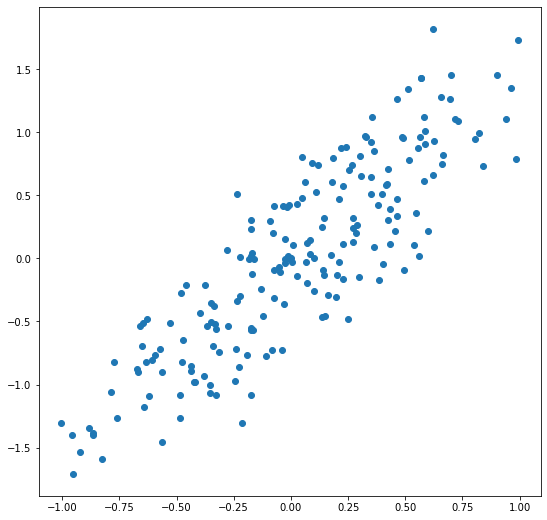

In [167]:
def randEllipse(ps,theta0,center,N):
    a,b = ps
    x0,y0 = center
    rot = np.array([[math.cos(theta0),math.sin(theta0)],[-math.sin(theta0),math.cos(theta0)]])
    result = []
    for i in range(N):
        r0 = np.random.normal(loc=1.0,scale=0.5)
        theta = np.random.uniform(0, 2*math.pi)
        point = np.matmul(np.array([x0+a*r0*math.cos(theta),y0+b*r0*math.sin(theta)]),rot)
        result.append(point)
    return result

cloud = np.array(randEllipse((0.25,1),-math.pi/6,(0,0),200))
data = pd.DataFrame({"x": cloud[:,0], "y": cloud[:,1]})

plt.scatter(data["x"],data["y"])

As you can see, the data scattered along the line $y=x$ while the distribution of the data along the line $y=-x$ quite tight.

If we consider "x" and "y" coordinates as the features of our dataset, the variations of the data is measured with the eigenvectors of the correlation matrix:

$$ Cor(D) = D^t D $$

[1.86585762 0.13414238]


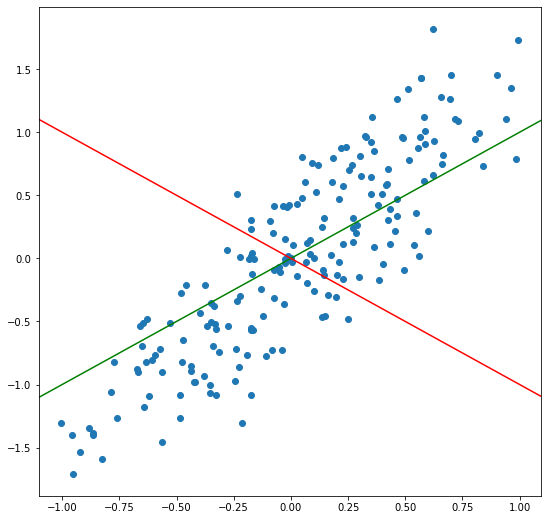

In [168]:
eigvals, eigvectors = np.linalg.eig(data.corr())
print(eigvals)

def perp(xs):
    return [xs[1],-xs[0]]

plt.scatter(data["x"],data["y"])
plt.axline([0,0],perp(eigvectors[0]),c='green')
plt.axline([0,0],eigvectors[0],c='red')

The hyperplane determined by the largest eigenvalue (the green line above) is the direction along which data has 
the largest variation while along the red line we don't see much variation. This means, if we project the data onto the green line we get the largest variation.  If we project onto the red line the data would look like constant.

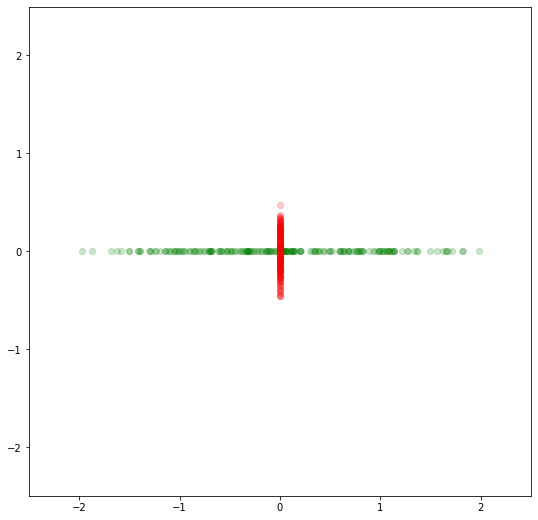

In [169]:
model = PCA()

projected = model.fit_transform(data)

plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))
plt.scatter(projected[:,0],np.zeros(len(projected)),c='green',alpha=0.2)
plt.scatter(np.zeros(len(projected)),projected[:,1],c='red',alpha=0.2)

## 1.2 Experiments

### 1.2.1 Iris

Let us try this a real dataset:

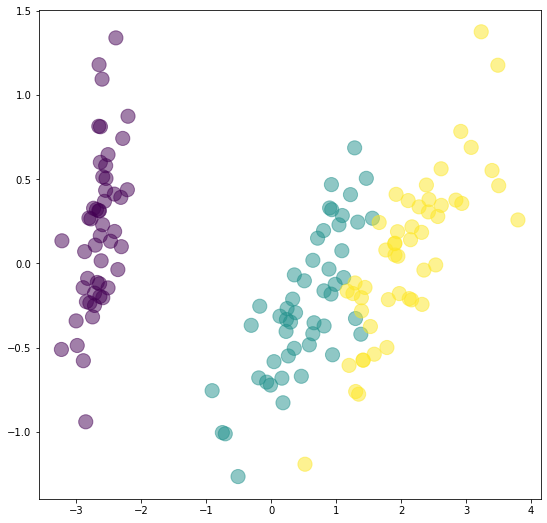

In [207]:
iris = datasets.load_iris()
model = PCA(n_components=2)
data = model.fit_transform(iris['data'])
plt.scatter(data[:,0],data[:,1], c=iris['target'], s=200, alpha=0.5)

In [198]:
model.inverse_transform

array([0.92461872, 0.05306648])

### 1.2.2 Digits

In [200]:
digits = datasets.load_digits()
digits['data'].shape

(1797, 64)

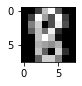

In [201]:
m = np.random.randint(1797)
plt.rcParams['figure.figsize'] = 1,1
plt.imshow(digits['data'][m].reshape((8,8)), cmap='gray')

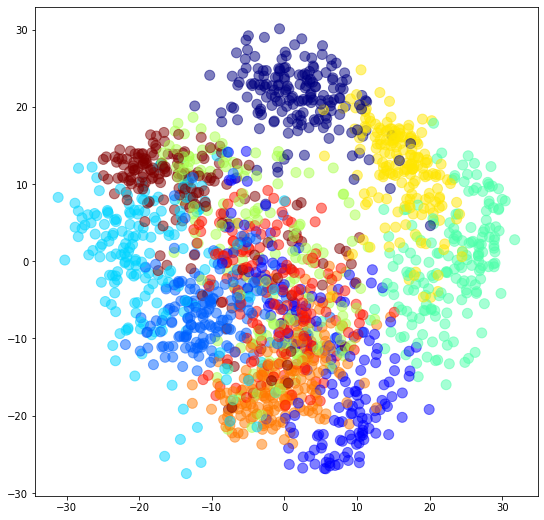

In [204]:
model = PCA(n_components=10)
plt.rcParams['figure.figsize'] = 9,9
data = model.fit_transform(digits['data'])
plt.scatter(data[:,0],data[:,1],c=digits['target'],cmap='jet',s=100,alpha=0.5)

In [205]:
model.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315985, 0.03661368, 0.03353177, 0.03078792])

### 1.2.3 Olivetti Face Datasets

In [63]:
faces = datasets.fetch_olivetti_faces()
faces['data'].shape

(400, 4096)

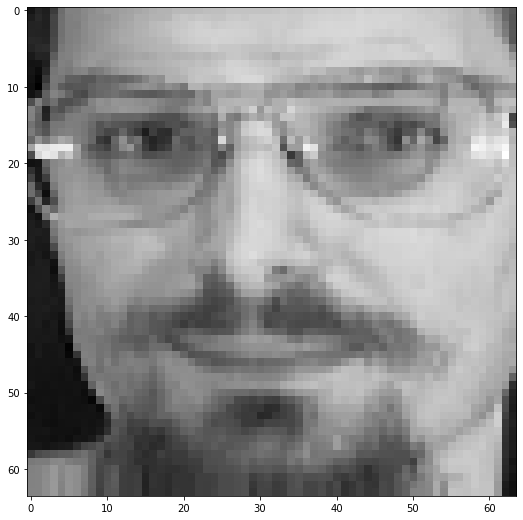

In [195]:
m = np.random.randint(400)
plt.imshow(faces['data'][m,:].reshape((64,64)),cmap='gray')

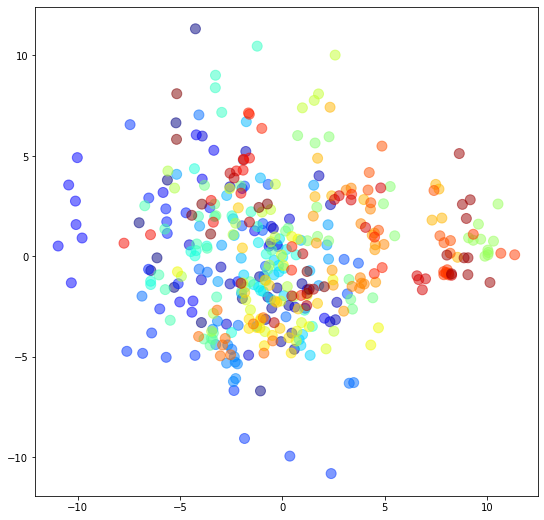

In [196]:
model = PCA(n_components=2)
data = model.fit_transform(faces['data'])
plt.scatter(data[:,0],data[:,1],c=faces['target'],cmap='jet',s=100,alpha=0.5)

### 1.2.4 Time Series


In [70]:
ts = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx')
ts

/home/kaygun/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.035754,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
...,...,...,...,...,...,...,...,...,...,...
532,2011-02-16 00:00:00,0.008599,0.0134,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
533,2011-02-17 00:00:00,0.00931,0.015977,0.003071,-0.001186,0.000345,0.00262,0.001686,-0.000581,0.001039
534,2011-02-18 00:00:00,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
535,2011-02-21 00:00:00,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


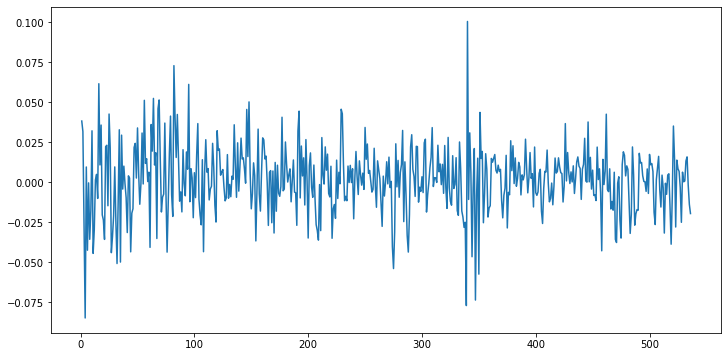

In [119]:
plt.rcParams['figure.figsize'] = 12,6
plt.plot(ts['USD BASED'][1:])

In [120]:
N = ts.shape[0]
m = 5

imkb = np.array([ts[i:i+m]['USD BASED'] for i in range(1,N-m)])
imkb

array([[0.038376187, 0.031812743, -0.026352966, -0.084715902,
        0.009658112],
       [0.031812743, -0.026352966, -0.084715902, 0.009658112,
        -0.042361155],
       [-0.026352966, -0.084715902, 0.009658112, -0.042361155,
        -0.000272183],
       ...,
       [0.00641822, 0.000404514, 0.000892722, 0.013399898, 0.015977203],
       [0.000404514, 0.000892722, 0.013399898, 0.015977203, -0.001652602],
       [0.000892722, 0.013399898, 0.015977203, -0.001652602,
        -0.013705988]], dtype=object)

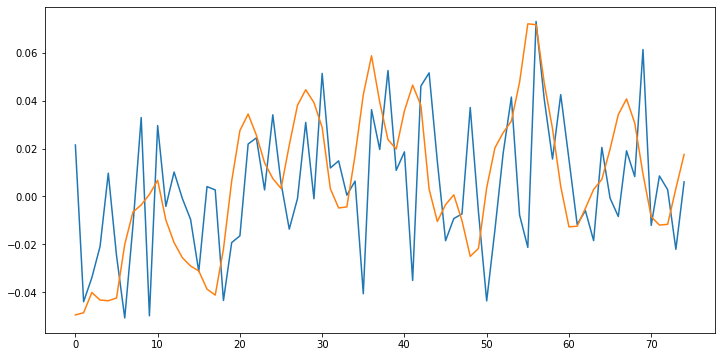

In [122]:
model = PCA(n_components=1)
data = model.fit_transform(imkb)
plt.plot(imkb[25:100,0])
plt.plot(data[25:100,0])

# 2. Linear Discriminant Analysis

## 2.1 Theory

Linear discriminant analysis uses linear algebra to separate data according to distinct labels.

In this basic setup, we have $(x^{(i)},y^{(i)})$ where each $x^{(i)}\in\mathbb{R}^n$ while each $y^{(i)}$ belongs to a finite set of labels.  Let us write $C^{\alpha}$ for the set of points $x^{(i)}$ for which $y^{(i)}=\alpha$. The main objective LDA tries to accomplish can be summarized as follows:

> Find a projection $\pi\colon \mathbb{R}^n\to \mathbb{R}^m$ where $m$ is much smaller than $n$ such that 
> 1. Each $C^\alpha$ is as compact as possible while
> 2. Each distinct $C^\alpha$ and $C^\beta$ are as separated as possible.

Let us assume each $C^\alpha$ has mean $\mu_\alpha$ and covariance $V_\alpha$. Then **the separation along a direction $w$** is the quantity

$$ S_\alpha(w) = \frac{w^T V_\alpha w}{w^TV w} $$

where $V$ is sum $\sum_\alpha V_\alpha$. What we need then is

$$ argmax_w S_\alpha(w) $$ for each class $\alpha$.

## 2.2 Experiments

### 2.2.1 Iris Dataset

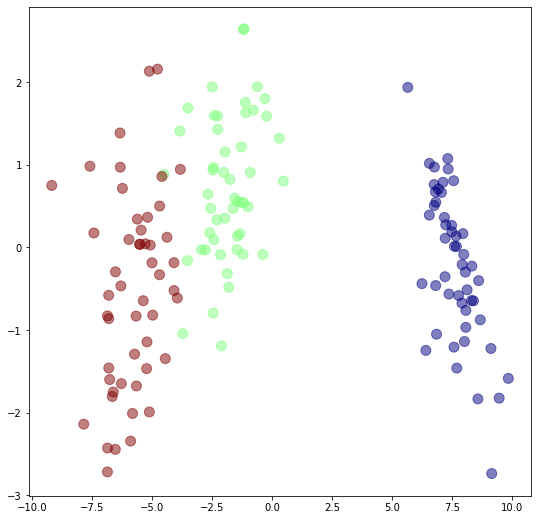

In [206]:
model = LDA(n_components=2)
data = model.fit_transform(iris['data'], iris['target'])
plt.rcParams['figure.figsize'] = (9,9)
plt.scatter(data[:,0],data[:,1],c=iris['target'],cmap='jet',s=100,alpha=0.5)

### 2.2.2 Digits

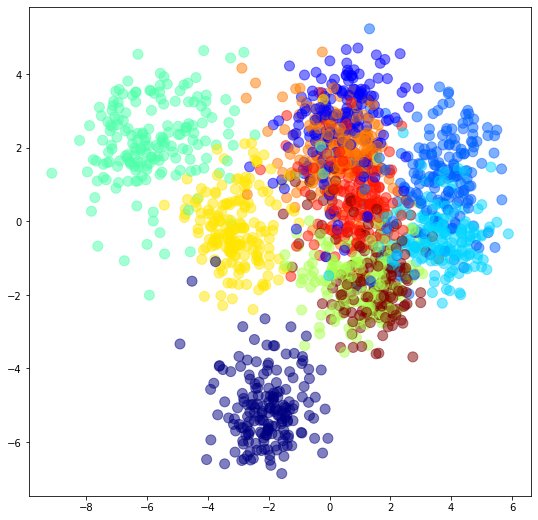

In [58]:
model = LDA(n_components=2)
data = model.fit_transform(digits['data'],digits['target'])
plt.scatter(data[:,0],data[:,1],c=digits['target'],cmap='jet',s=100,alpha=0.5)

### 2.2.3 Olivetti Faces Dataset

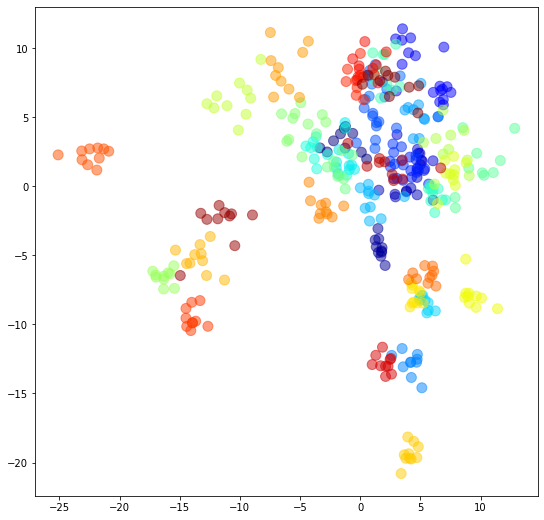

In [57]:
model = LDA(n_components=2)
data = model.fit_transform(faces['data'],faces['target'])
plt.scatter(data[:,0],data[:,1],c=faces['target'],cmap='jet',s=100,alpha=0.5)

# 3. t-Stochastic Neighbor Embedding

## 3.1 Theory

Read the [original article](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) and this [link](https://pubs.acs.org/doi/10.1021/acs.jctc.8b00652).

## 3.2 Experiments



/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


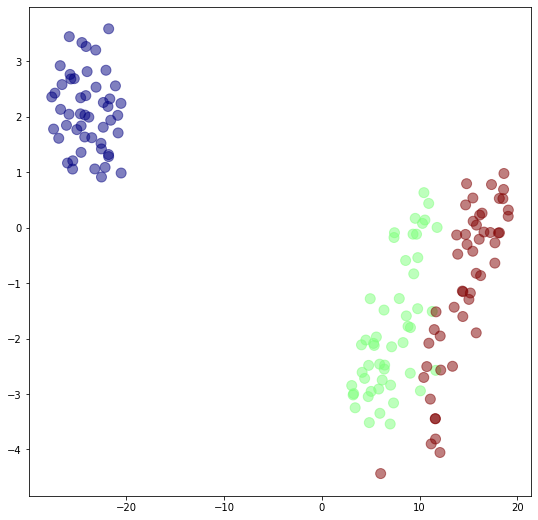

In [109]:
model = TSNE(n_components=2, init='pca', learning_rate='auto')
data = model.fit_transform(iris['data'], iris['target'])
plt.scatter(data[:,0],data[:,1],c=iris['target'],cmap='jet',s=100,alpha=0.5)

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


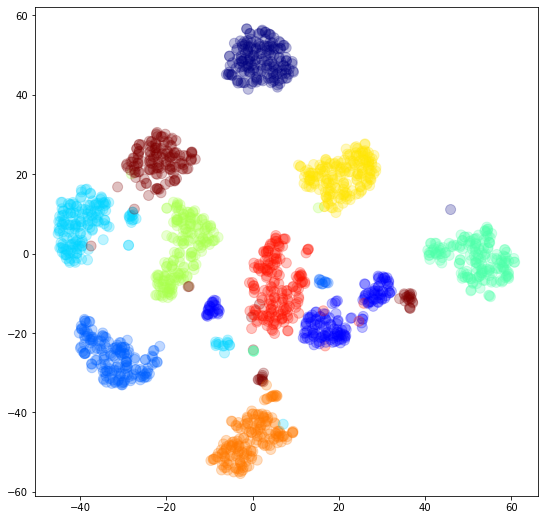

In [110]:
model = TSNE(n_components=2, init='pca', learning_rate='auto')
data = model.fit_transform(digits['data'],digits['target'])
plt.scatter(data[:,0],data[:,1],c=digits['target'],cmap='jet',s=100,alpha=0.25)

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


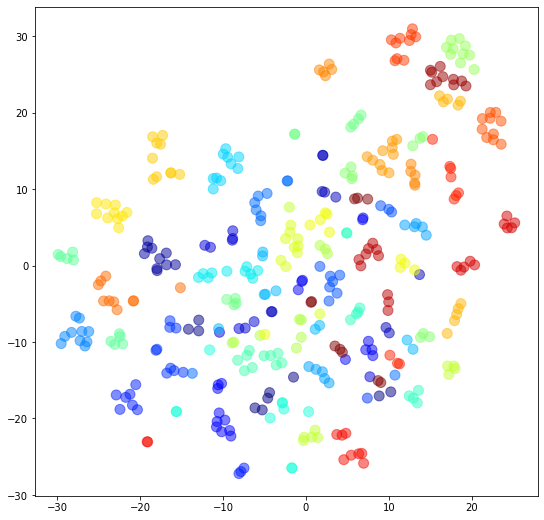

In [111]:
model = TSNE(n_components=2, init='pca', learning_rate='auto')
data = model.fit_transform(faces['data'],faces['target'])
plt.scatter(data[:,0],data[:,1],c=faces['target'],cmap='jet',s=100,alpha=0.5)

In [104]:
faces['data'].shape

(400, 4096)

## 4. Support Vector Machines

### 4.1 Theory

The main idea behind SVM is that our labeled data might be embedded in a vector space such that each cluster with different labels are separable via a hyperplane.

In this setup, the data we have is a set of pairs $(x^{(i)},y^{(i)})$ where $x^{(i)}\in\mathbb{R}^n$ and $y^{(i)}=
\pm 1$ for every index $i=1,\ldots,N$.

Below, I will sample a random collection of points from $\mathbb{R}^2$ separable by many different hyperplanes.

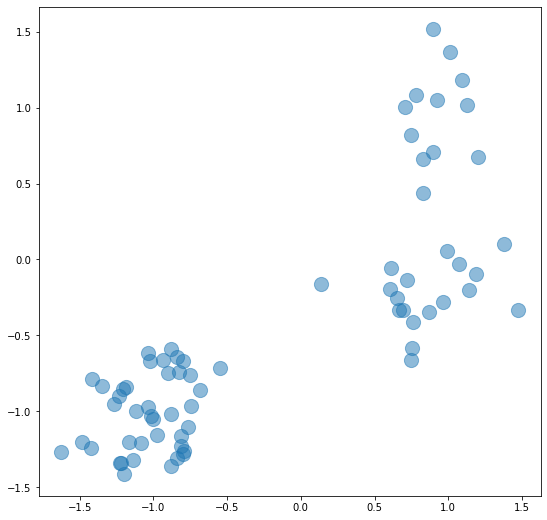

In [208]:
def randDisk(center,r,N):
    result = []
    x0,y0=center
    for i in range(N):
        r0 = np.random.normal(loc=r,scale=r/2)
        theta = np.random.uniform(0, 2*math.pi)
        result.append([x0+r0*math.cos(theta),y0+r0*math.sin(theta)])
    return result

tmp = randDisk([1,1],0.3,10)
tmp.extend(randDisk([-1,-1],0.3,40))
tmp.extend(randDisk([1,0],0.5,20))
cloud = np.array(tmp)
v = [1,1]
colors = [1 if np.dot(x,v)>0 else -1 for x in cloud]
data = pd.DataFrame({"x": cloud[:,0], "y": cloud[:,1], "class": colors})

plt.scatter(data['x'],data['y'],s=200,alpha=0.5,cmap='jet')

Now, look at the picture below. We need a vector $v$ such that the gap between the separating hyperplanes is the largest. Below, the code tries random vectors for the normals of the separating hyperplanes. The correct method is doing a gradient descent algorithm that maximizes the gap that I outlined in the previous lecture.

In [209]:
def findBeta(v,xs,side):
    d = np.array([v[1],-v[0]])
    tmp = [np.dot(x,v) for x in xs]
    if side == -1:
        i = np.argmin(tmp)
    else:
        i = np.argmax(tmp)
    return [xs[i],xs[i]+d]

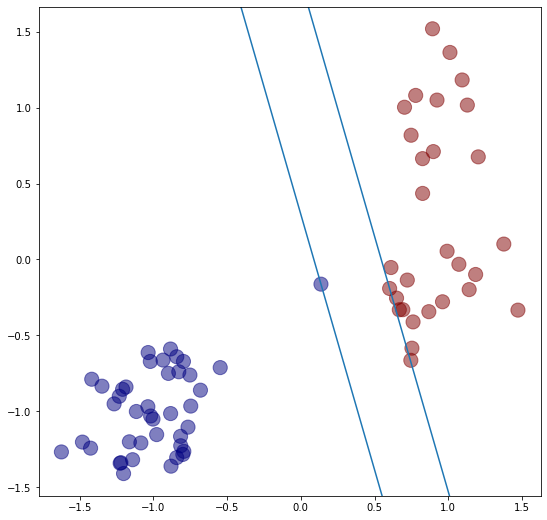

In [216]:
v = randDisk([0,0],1,1)[0]

xs = np.array(data[["x","y"]][data["class"]==1])
ys = np.array(data[["x","y"]][data["class"]==-1])

a,b = findBeta(v,xs,-1)
c,d = findBeta(v,ys,1)

plt.scatter(cloud[:,0],cloud[:,1],c=colors,cmap='jet',s=200,alpha=0.5)
plt.axline(a,b)
plt.axline(c,d)

We need a separating hyperplane given by a pair $(w,b)$ where $w\in\mathbb{R}^n$ and $b\in \mathbb{R}$ such that

$y^{(i)}(x^{(i)}\cdot w - b)\geq 1$ for every $i=1,\ldots,N$

If this condition is satisfied then the gap between the separating hyperplanes becomes $\frac{2}{\|w\|}$. Thus maximizing the gap becomes equivalent to finding a suitable vector $w$ with the smallest norm.

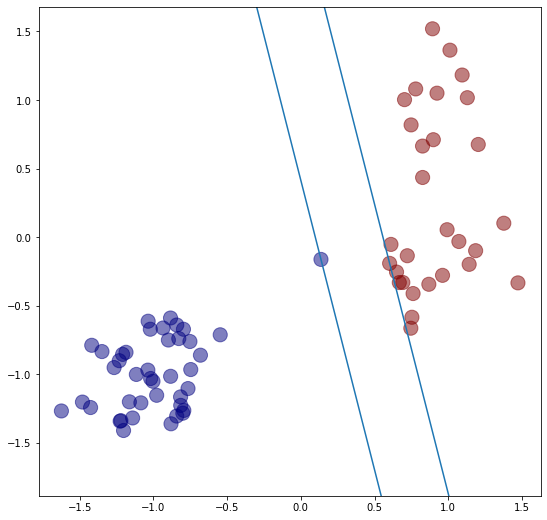

In [217]:
model = SVC(kernel="linear")

model.fit(data[["x","y"]],data["class"])

v = model.coef_[0]
a,b = findBeta(v,xs,-1)
c,d = findBeta(v,ys,1)
plt.scatter(data["x"],data["y"],c=data["class"],cmap='jet',s=200,alpha=0.5)
plt.axline(a,b)
plt.axline(c,d)

### 4.2 Hard Margin vs Soft Margin

The standard SVM model operates on the assumption that the data is separable. This situation is described by having a **hard margin**.

In cases where the data is not completely separable, we might allow some mixing within the margin. In these cases, we use a **soft margin**

/tmp/ipykernel_1347666/2375658399.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame({"x": new[:,0], "y": new[:,1], "class": cnew}))


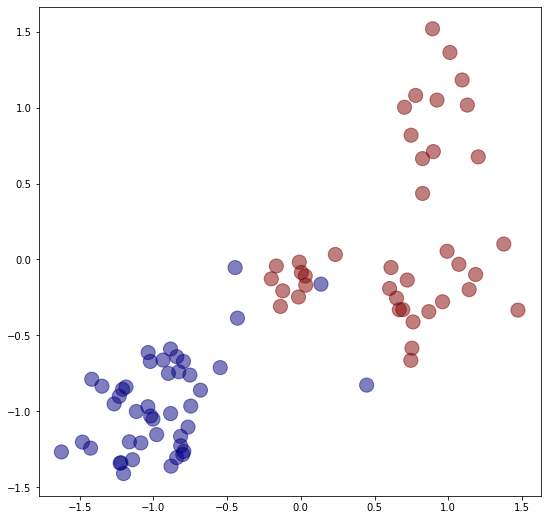

In [220]:
N1 = 10
N2 = 3
cnew = list([1]*N1 + [-1]*N2)
new = randDisk([0.0,0.0],0.2,N1)
new.extend(randDisk([-0.1,-0.5],0.4,N2))
new = np.array(new)

data = data.append(pd.DataFrame({"x": new[:,0], "y": new[:,1], "class": cnew}))
cloud = np.array(data)

plt.scatter(data.x,data.y,c=data["class"],cmap='jet',s=200,alpha=0.5)

In these cases instead of minimizing $\|w\|$ subject to 

$ 1 \leq y^{(i)}(x^{(i)}\cdot w - b) $ for all $i=1,\ldots,N$ 

we minimize the **total hinge loss function**
$$ \lambda \|w\| + \sum_i \max(0,1-y^{(i)}(x^{(i)}\cdot w - b)) $$
where $\lambda$ is a small positive regularization parameter. Changing $\lambda$ controls the degree of mixing of classes inside the margin.  Below, we set $\lambda = 1.0$ by setting `C=1.0`.

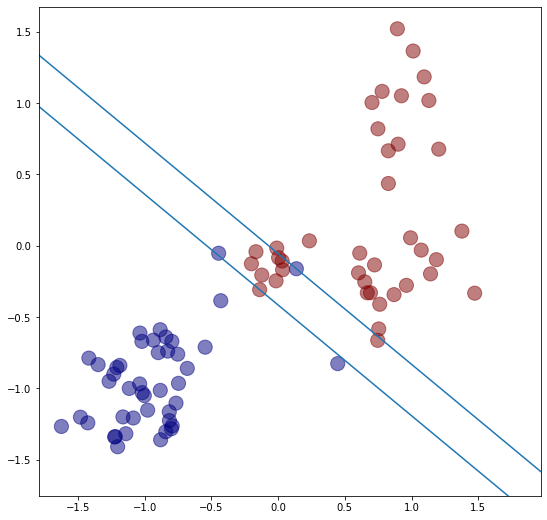

In [221]:
xs = np.array(data[["x","y"]][data["class"]==1])
ys = np.array(data[["x","y"]][data["class"]==-1])

model = SVC(kernel="linear",C=1.0)
model.fit(data[["x","y"]],data["class"])

v = model.coef_[0]
a,b = findBeta(v,xs,-1)
c,d = findBeta(v,ys,1)
plt.scatter(data.x,data.y,c=data["class"],cmap='jet',s=200,alpha=0.5)
plt.axline(a,b)
plt.axline(c,d)

### 4.3 The Kernel Trick

There is another parameter that we can play with. That is the inner product we work with. 

Recall that our method heavily relies on the inner product since we either minimize $\|w\|$ subject to 

$y^{(i)}(x^{(i)}\cdot w - b) \geq 0 $

or minimizing the total hinge loss function

$\lambda \|w\| + \sum_i \max(0,1-y^{(i)}(x^{(i)}\cdot w - b))$

We can also use different inner products other than the ordinary Euclidean one:

$x\cdot y = \sum_i x_i y_i$

This method is equivalent to embedding $\mathbb{R}^n$ into another larger $\mathbb{R}^m$ via a (non)linear embedding and then using the ambient Euclidean product in $\mathbb{R}^m$.  This is useful when the original dataset is not linearly separable.

There are three main classes of kernels you can use

* linear
* polynomial
* radial basis function (RBF)

You can read the documentation [here](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html).

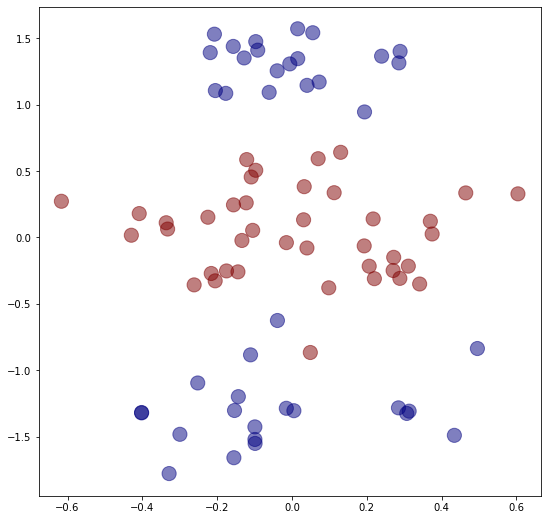

In [222]:
tmp = randDisk([0,0],0.4,40)
tmp.extend(randDisk([0,1.3],0.2,20))
tmp.extend(randDisk([0,-1.3],0.3,20))
cloud = np.array(tmp)

colors = [1]*40 + [-1]*40

data = pd.DataFrame({"x" : cloud[:,0], "y": cloud[:,1], "class": colors})
plt.scatter(data["x"],data["y"],c=data["class"],cmap='jet',s=200,alpha=0.5)

In [231]:
model = SVC(kernel="rbf",C=1.0,degree=2)
model.fit(data[["x","y"]],data["class"])

model.score(data[["x","y"]],data["class"])

0.975

## 4.4 Multiclass SVM

Above we worked with SVM with binary classification. However, SVM is versatile enough to work with multiclass classification problems.

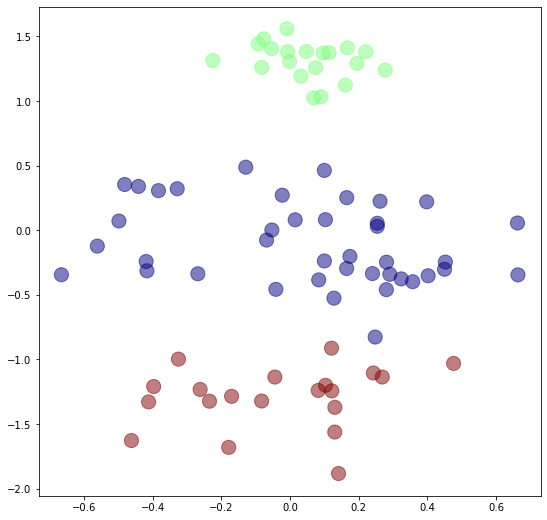

In [232]:
tmp = randDisk([0,0],0.4,40)
tmp.extend(randDisk([0,1.3],0.2,20))
tmp.extend(randDisk([0,-1.3],0.3,20))
cloud = np.array(tmp)

colors = [1]*40 + [2]*20 + [3]*20

data = pd.DataFrame({"x" : cloud[:,0], "y": cloud[:,1], "class": colors})
plt.scatter(data["x"],data["y"],c=data["class"],cmap='jet',s=200,alpha=0.5)

In [233]:
model = SVC(kernel="linear")
model.fit(data[["x","y"]],data["class"])

model.score(data[["x","y"]],data["class"])

0.9875